<font face="Georgia" size=3>
    
Harsh Seksaria
    
2048011
    
2 - MDS
    
---
    
Machine Learning Lab 9
    
    KNN Classifier
    
    10 April, 2021
    
---
    
CHRIST (Deemed to be University)
    
</font>

In [1]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <font face=Georgia>Categorical data - IRIS</font>

In [4]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset in dataframe
data = pd.read_csv("iris.data", names=colnames)

In [19]:
data.sample(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
5,5.4,3.9,1.7,0.4,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa


## <font face=Georgia>Preprocessing</font>

In [7]:
data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

There are no null values in the dataset.

In [8]:
#Dividing dataset into x and y
x = data.drop('Class', axis=1)
y = data['Class']

In [9]:
#Dividing dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=11)

## <font face=Georgia>Feature Scaling</font>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## <font face=Georgia>Model</font>

In [137]:
#using weighted euclidean distance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[12  0  0]
 [ 0 11  0]
 [ 0  2 13]]

Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        38
      macro avg       0.95      0.96      0.95        38
   weighted avg       0.96      0.95      0.95        38



In [103]:
#using hamming distance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, metric="hamming")
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[12  0  0]
 [ 0 10  1]
 [ 0  4 11]]

Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.71      0.91      0.80        11
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.87        38
      macro avg       0.88      0.88      0.87        38
   weighted avg       0.88      0.87      0.87        38



Euclidean distance performs better than hamming.

## <font face=Georgia>Comparing Error Rate with the K Value</font>

In [79]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

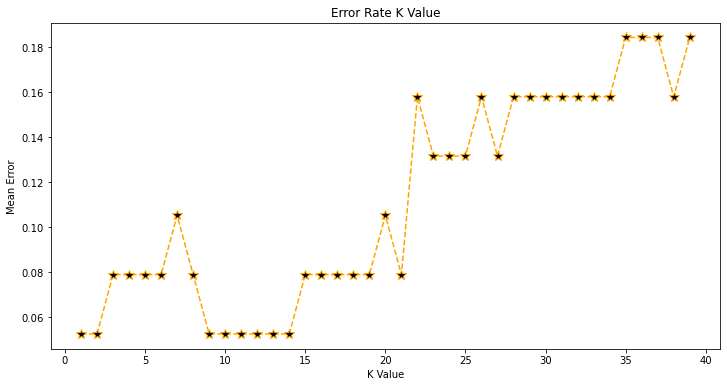

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='orange', linestyle='dashed', marker='*',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the above graph we can tell that error is zero when k is 1 or 2 or it lies between 9 and 14.

# <font face=Georgia>Binary data - Breast Cancer</font>

In [107]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fl = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
fl.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
x = fl
y = pd.DataFrame(cancer['target'], columns = ['CancerType'])

In [111]:
x.shape, y.shape

((569, 30), (569, 1))

In [115]:
#Dividing dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=11)

## <font face=Georgia>Model</font>

In [118]:
#using euclidean distance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

<ipython-input-118-63d2411caa47>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, Y_train)


In [119]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[42  8]
 [ 0 93]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.92      1.00      0.96        93

    accuracy                           0.94       143
   macro avg       0.96      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



In [125]:
#using jaccard distance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=13, metric="jaccard")
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

<ipython-input-125-5e0d841da6e6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, Y_train)


In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[ 0 50]
 [ 0 93]]

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.65      1.00      0.79        93

    accuracy                           0.65       143
   macro avg       0.33      0.50      0.39       143
weighted avg       0.42      0.65      0.51       143



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can cleraly see that euclidean distance performs better than jaccard distance.

# <font face=Georgia>Numerical data - Diabetes</font>

In [129]:
fl = pd.read_csv('diabetes.csv')
fl.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
52,5,88,66,21,23,24.4,0.342,30,0
56,7,187,68,39,304,37.7,0.254,41,1
727,0,141,84,26,0,32.4,0.433,22,0
338,9,152,78,34,171,34.2,0.893,33,1
487,0,173,78,32,265,46.5,1.159,58,0


In [138]:
x = fl.drop(['Outcome'], axis=1)
y = fl.Outcome

In [139]:
#Dividing dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=11)

## <font face=Georgia>Model</font>

In [140]:
#using euclidean distance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[107  19]
 [ 35  31]]

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       126
           1       0.62      0.47      0.53        66

    accuracy                           0.72       192
   macro avg       0.69      0.66      0.67       192
weighted avg       0.71      0.72      0.71       192



In [142]:
#using manhattan distance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, metric="manhattan")
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report\n", classification_report(Y_test, y_pred))

Confusion Matrix
 [[111  15]
 [ 39  27]]

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       126
           1       0.64      0.41      0.50        66

    accuracy                           0.72       192
   macro avg       0.69      0.65      0.65       192
weighted avg       0.71      0.72      0.70       192



Model using manhattan distance performed better than euclidean.